# Sadaa Vijayee Project 1

### Exploratory Analysis

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

df = pd.read_csv("cleaned_healthcare_dataset.csv")


In [141]:
print("Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Shape: (51273, 27)
               Name  Age  Gender Blood_Type Medical_Condition  \
0    Robert Nichols   61    Male         O+            Cancer   
1    William Zavala   53  Female         A+           Obesity   
2  Danielle Gregory   57  Female         A+            Asthma   
3     Michael Smith   17  Female         A-           Obesity   
4  Kimberly Bridges   68  Female         B+      Hypertension   

  Date_of_Admission Discharge_Date Admission_Type  Room_Number  \
0        18-05-2019     22-05-2019      Emergency          353   
1        04-01-2021     03-02-2021      Emergency          369   
2        21-04-2024     24-04-2024       Elective          353   
3        17-07-2020     31-07-2020         Urgent          128   
4        31-07-2019     24-08-2019      Emergency          366   

            Doctor  ... BMI_Category Systolic_BP  Diastolic_BP Cholesterol  \
0        Aaron Fox  ...       Normal       120.0          80.0      Normal   
1       Mark Allen  ...        Obese 

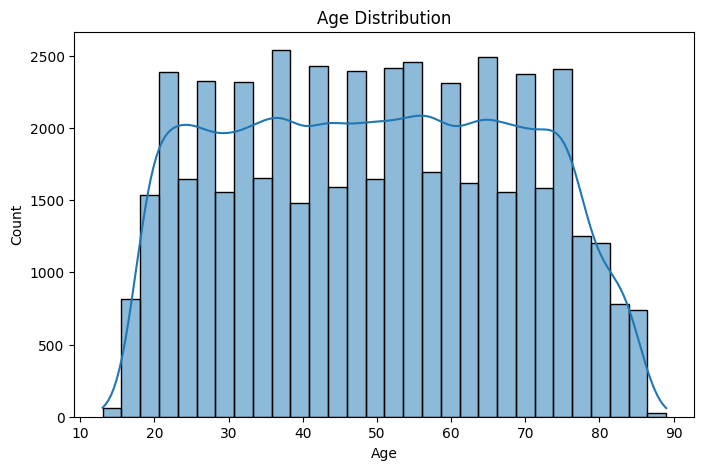

In [142]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

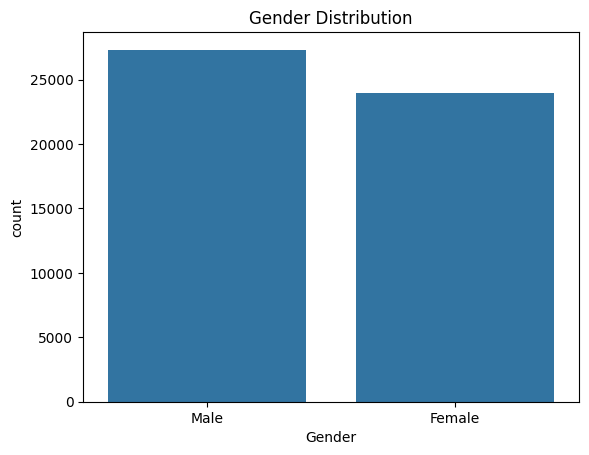

In [143]:
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.show()

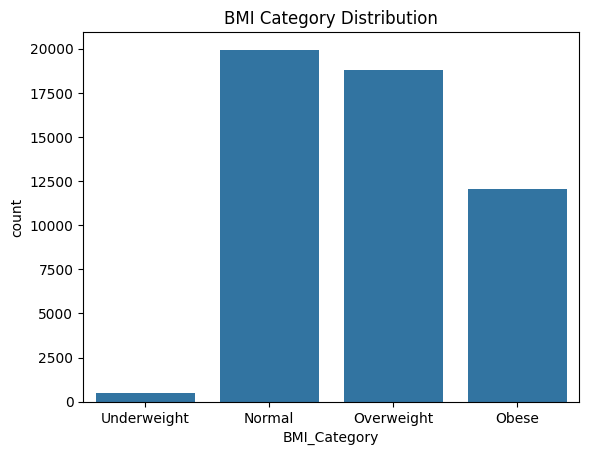

In [144]:
sns.countplot(data=df, x="BMI_Category", order=["Underweight","Normal","Overweight","Obese"])
plt.title("BMI Category Distribution")
plt.show()

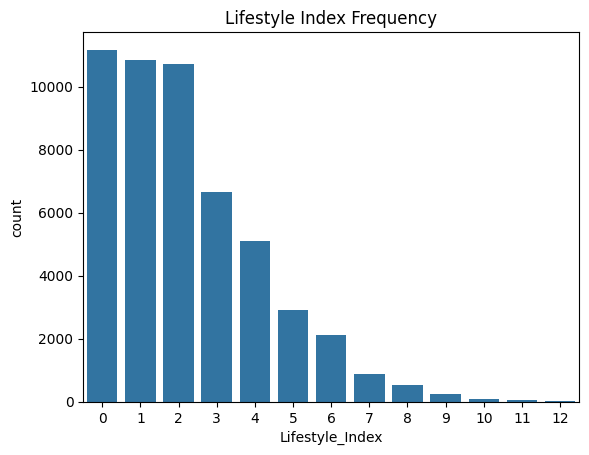

In [145]:
sns.countplot(data=df, x="Lifestyle_Index")
plt.title("Lifestyle Index Frequency")
plt.show()

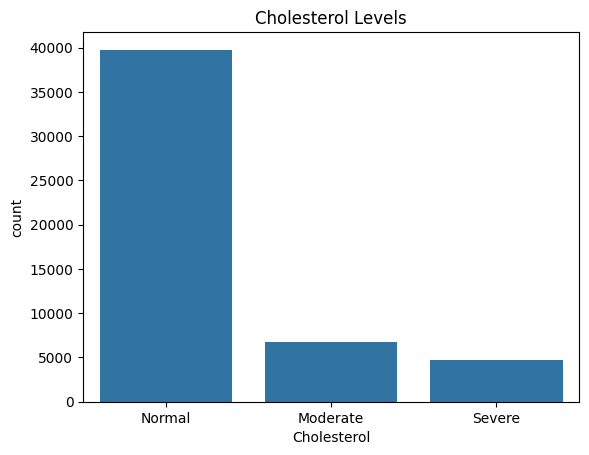

In [146]:
sns.countplot(data=df, x="Cholesterol", order=["Normal", "Moderate", "Severe"])
plt.title("Cholesterol Levels")
plt.show()

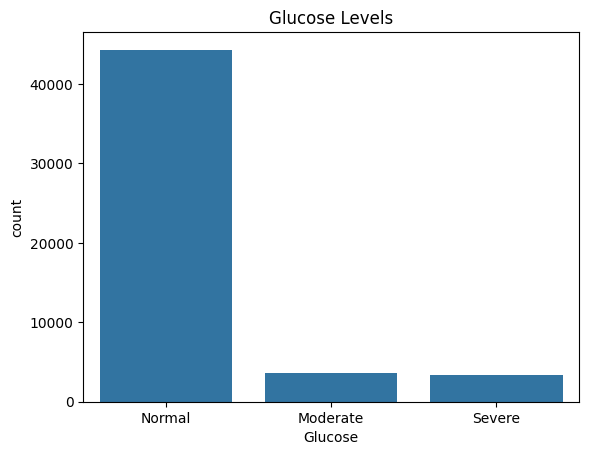

In [147]:
sns.countplot(data=df, x="Glucose", order=["Normal", "Moderate", "Severe"])
plt.title("Glucose Levels")
plt.show()

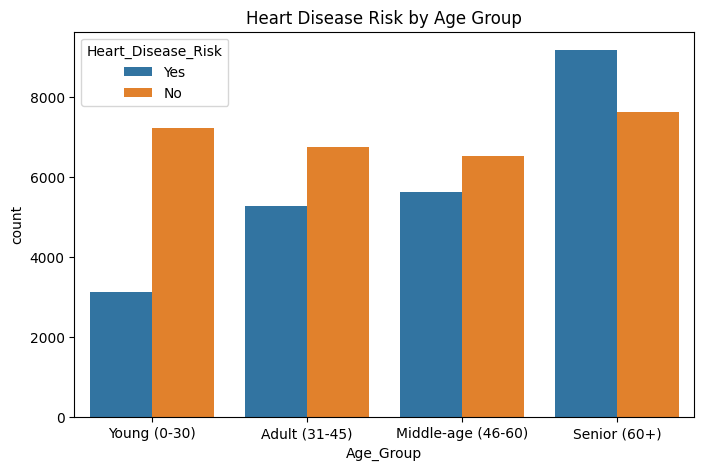

In [148]:
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 30, 45, 60, 120],  
    labels=["Young (0-30)", "Adult (31-45)", "Middle-age (46-60)", "Senior (60+)"]
)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Age_Group", hue="Heart_Disease_Risk")
plt.title("Heart Disease Risk by Age Group")
plt.show()


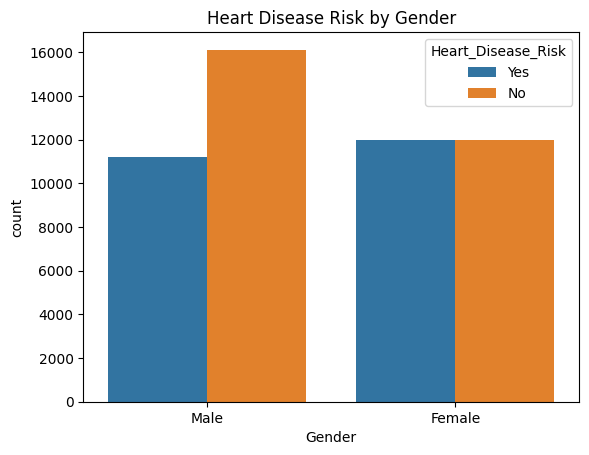

In [149]:
sns.countplot(data=df, x="Gender", hue="Heart_Disease_Risk")
plt.title("Heart Disease Risk by Gender")
plt.show()


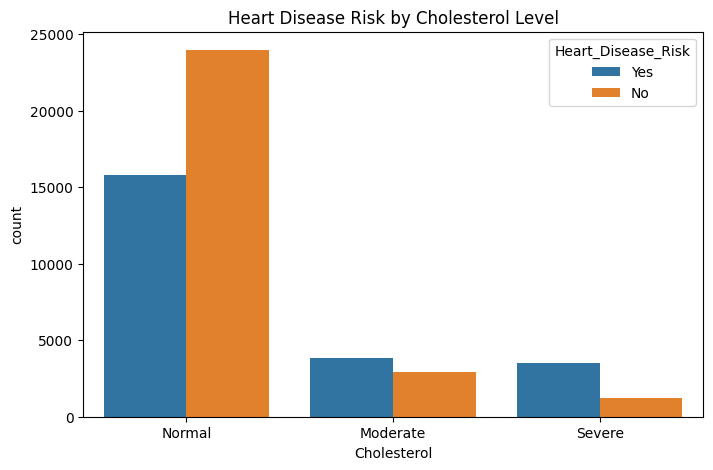

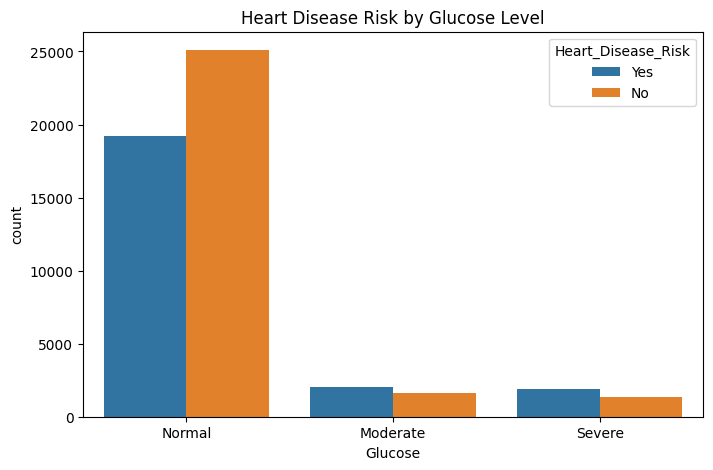

In [150]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Cholesterol", hue="Heart_Disease_Risk", order=["Normal", "Moderate", "Severe"])
plt.title("Heart Disease Risk by Cholesterol Level")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Glucose", hue="Heart_Disease_Risk", order=["Normal", "Moderate", "Severe"])
plt.title("Heart Disease Risk by Glucose Level")
plt.show()


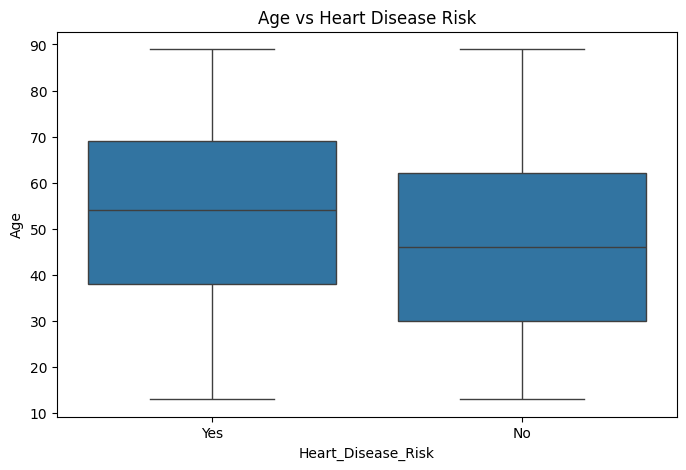

In [151]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Heart_Disease_Risk", y="Age")
plt.title("Age vs Heart Disease Risk")
plt.show()

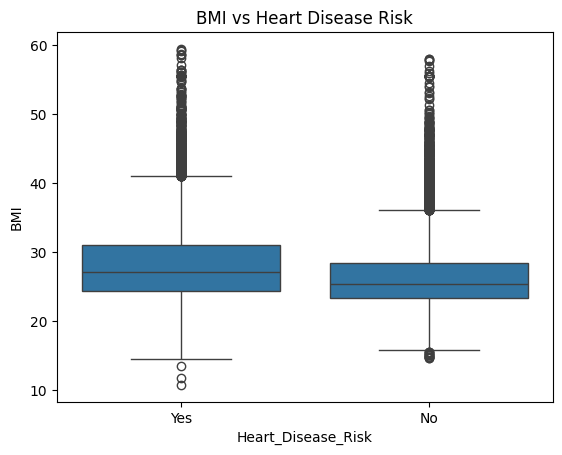

In [152]:
sns.boxplot(data=df, x="Heart_Disease_Risk", y="BMI")
plt.title("BMI vs Heart Disease Risk")
plt.show()

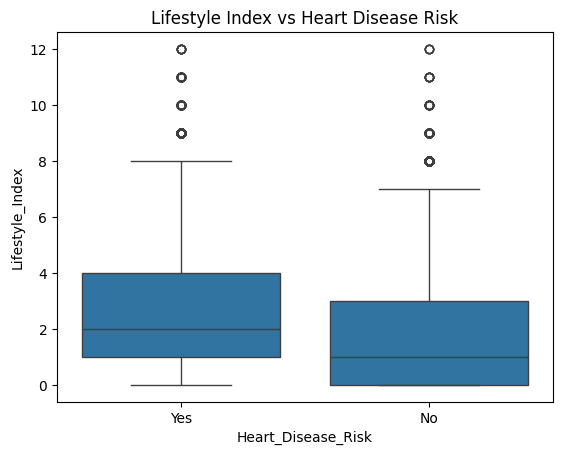

In [153]:
sns.boxplot(data=df, x="Heart_Disease_Risk", y="Lifestyle_Index")
plt.title("Lifestyle Index vs Heart Disease Risk")
plt.show()


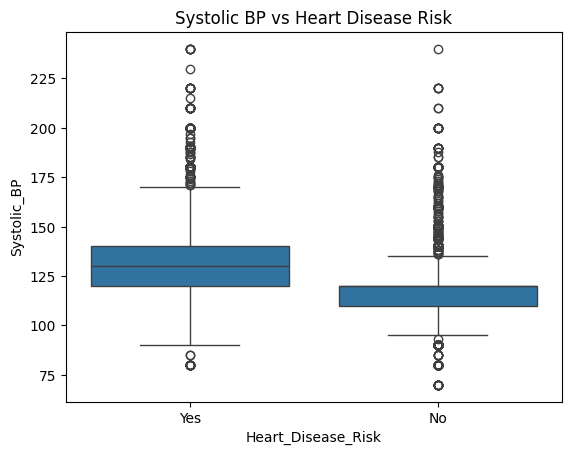

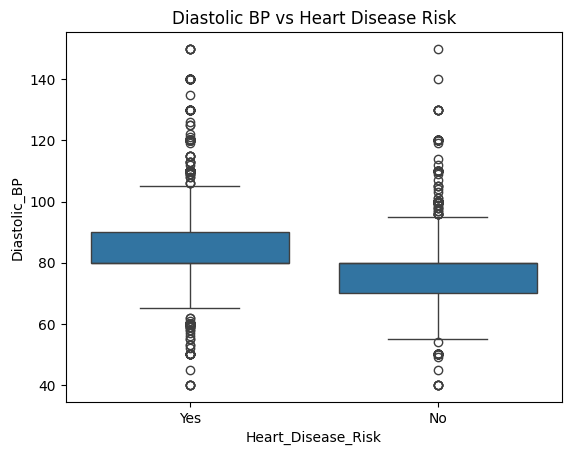

In [154]:
sns.boxplot(data=df, x="Heart_Disease_Risk", y="Systolic_BP")
plt.title("Systolic BP vs Heart Disease Risk")
plt.show()

sns.boxplot(data=df, x="Heart_Disease_Risk", y="Diastolic_BP")
plt.title("Diastolic BP vs Heart Disease Risk")
plt.show()

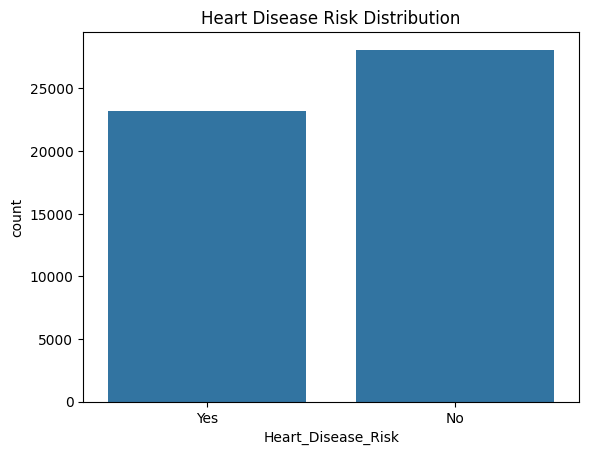

In [155]:
sns.countplot(data=df, x="Heart_Disease_Risk")
plt.title("Heart Disease Risk Distribution")
plt.show()



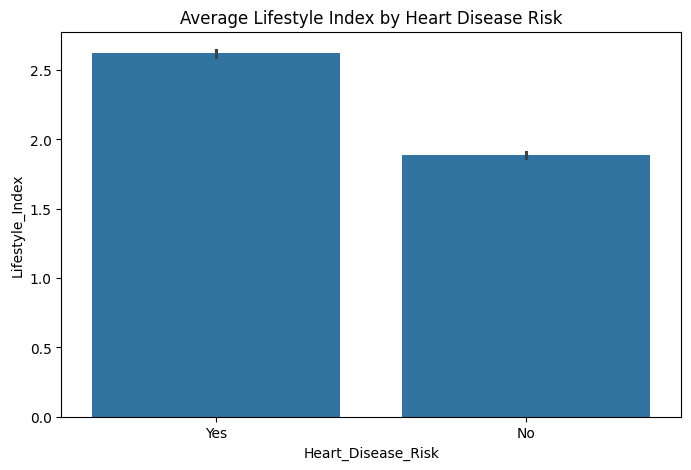

In [156]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Heart_Disease_Risk", y="Lifestyle_Index")
plt.title("Average Lifestyle Index by Heart Disease Risk")
plt.show()


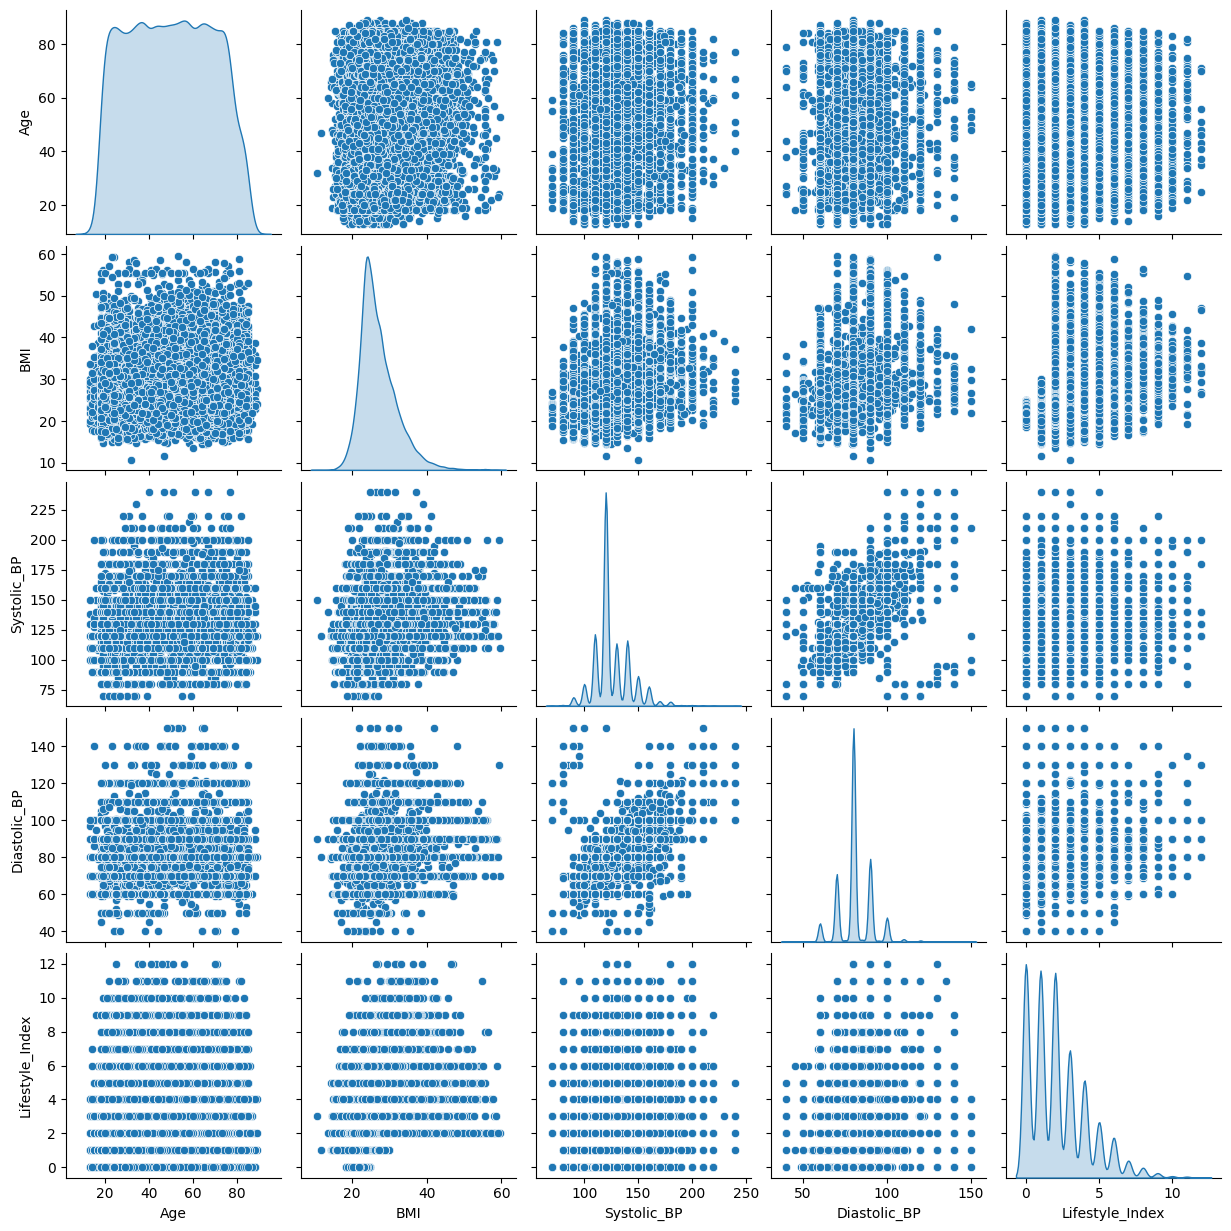

In [157]:
sns.pairplot(
    df[["Age", "BMI", "Systolic_BP", "Diastolic_BP", "Lifestyle_Index"]],
    diag_kind="kde"
)
plt.show()


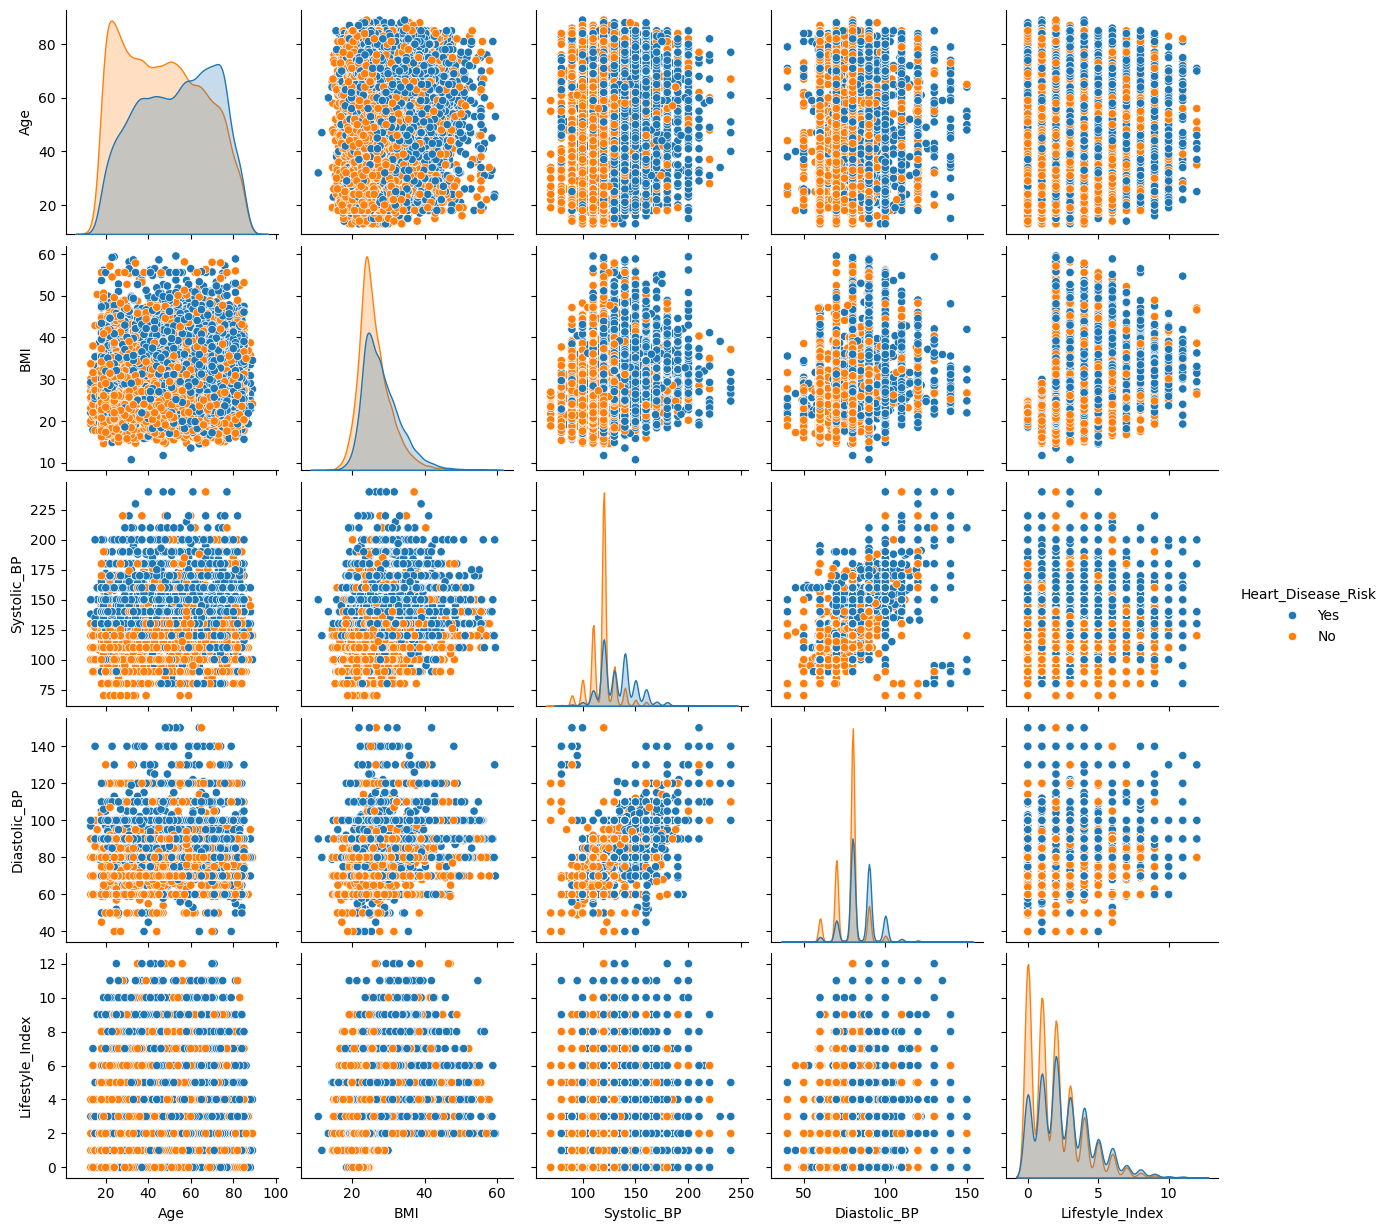

In [158]:
sns.pairplot(
    df[["Age","BMI","Systolic_BP","Diastolic_BP","Lifestyle_Index","Heart_Disease_Risk"]],
    hue="Heart_Disease_Risk",
    diag_kind="kde"
)
plt.show()

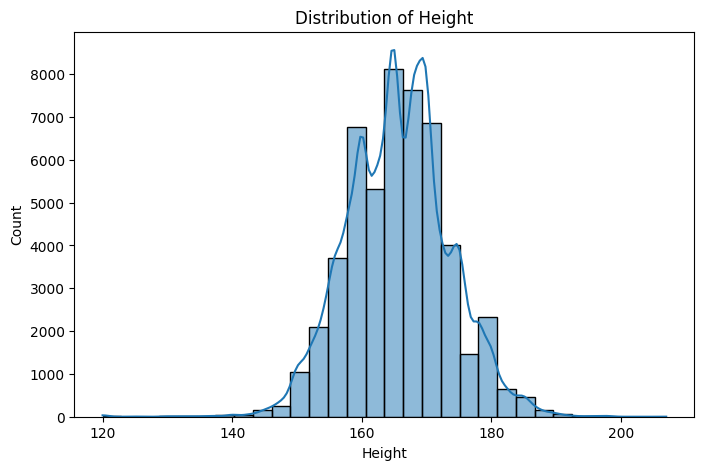

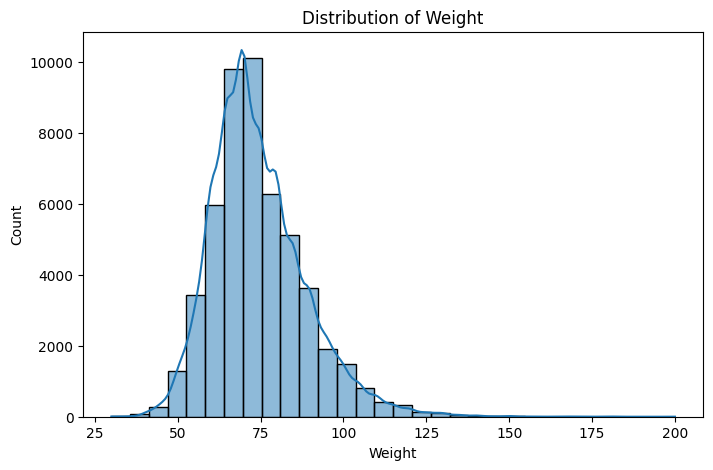

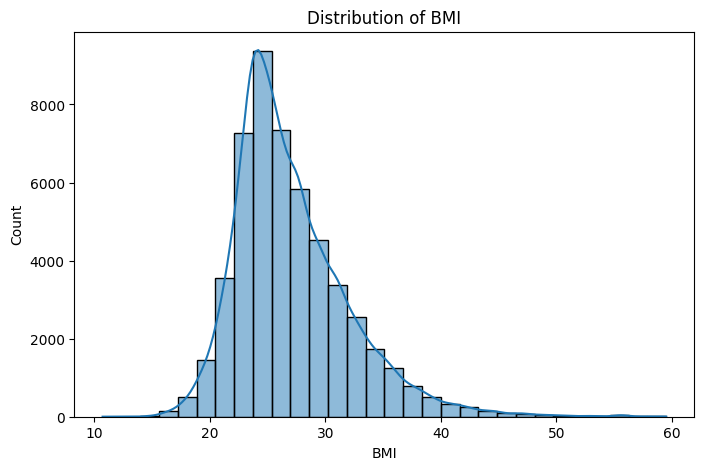

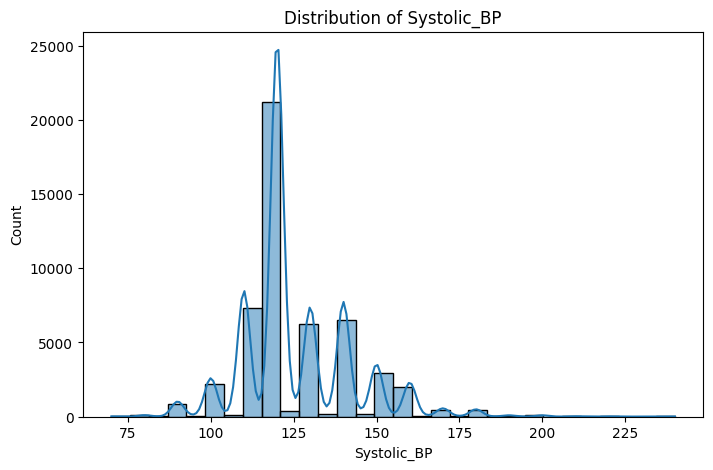

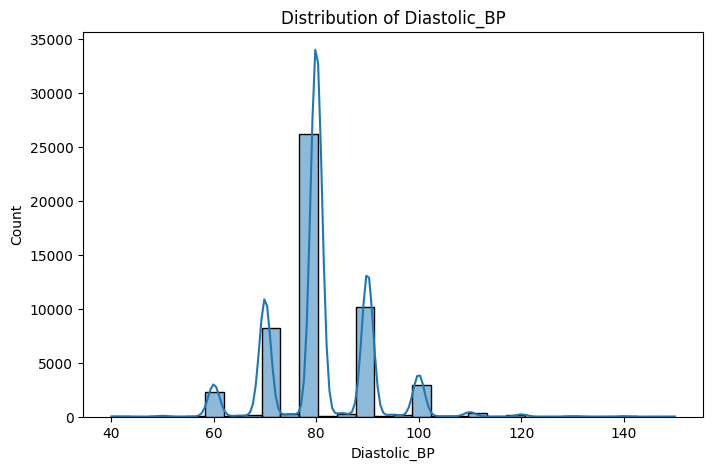

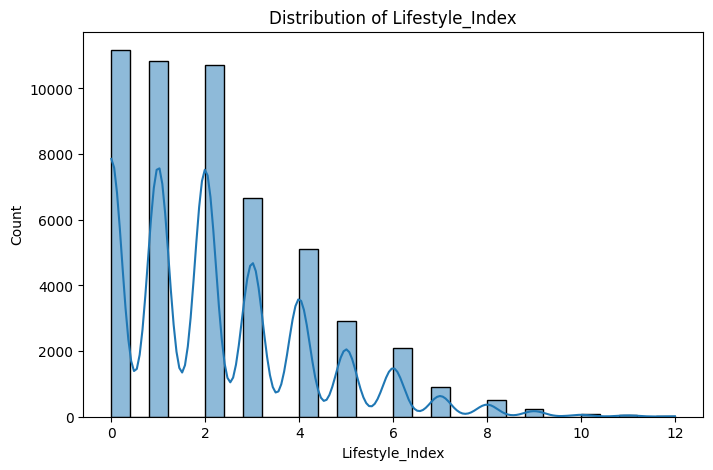

In [159]:
num_cols = ["Height","Weight","BMI","Systolic_BP","Diastolic_BP","Lifestyle_Index"]

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


In [160]:
def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    r, k = confusion.shape
    return np.sqrt(chi2/(n*(min(r,k)-1)))

categorical_cols = ["Gender","Blood_Type","Medical_Condition","Cholesterol","Glucose","BMI_Category"]

for col in categorical_cols:
    print(col, ":", cramers_v(df[col], df["Heart_Disease_Risk"]))

Gender : 0.0899762123318042
Blood_Type : 0.011969191854312502
Medical_Condition : 0.008021316751389023
Cholesterol : 0.22045153429541603
Glucose : 0.0934277199715571
BMI_Category : 0.18388145317598728


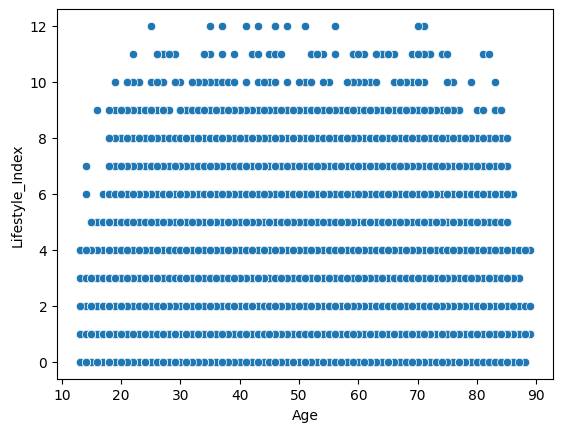

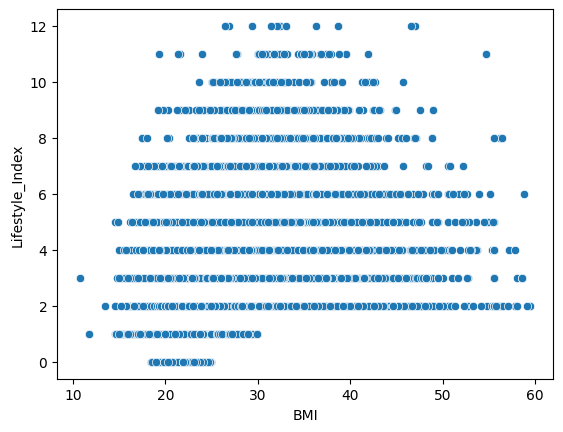

In [161]:
sns.scatterplot(data=df, x="Age", y="Lifestyle_Index")
plt.show()
sns.scatterplot(data=df, x="BMI", y="Lifestyle_Index")
plt.show()


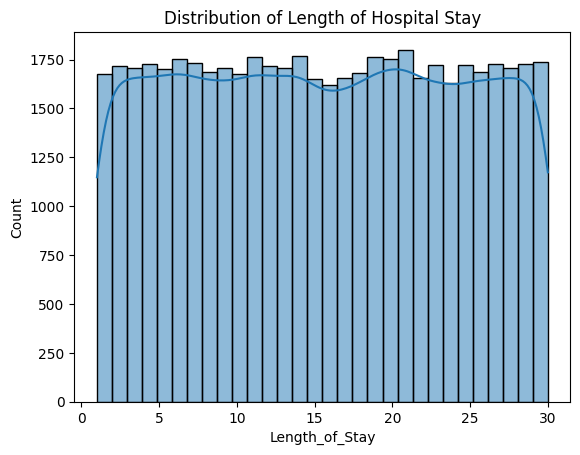

In [162]:
df["Date_of_Admission"] = pd.to_datetime(df["Date_of_Admission"], format="%d-%m-%Y", errors="coerce")
df["Discharge_Date"] = pd.to_datetime(df["Discharge_Date"], format="%d-%m-%Y", errors="coerce")

df["Length_of_Stay"] = (df["Discharge_Date"] - df["Date_of_Admission"]).dt.days

sns.histplot(df["Length_of_Stay"], bins=30, kde=True)
plt.title("Distribution of Length of Hospital Stay")
plt.show()


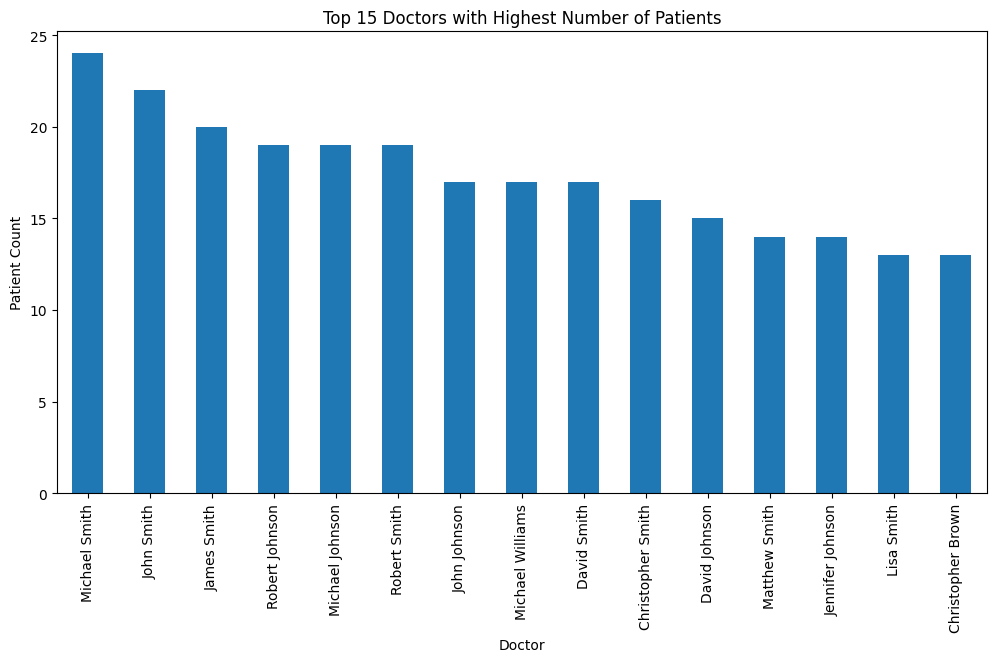

In [163]:
plt.figure(figsize=(12,6))
df["Doctor"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Doctors with Highest Number of Patients")
plt.xlabel("Doctor")
plt.ylabel("Patient Count")
plt.show()


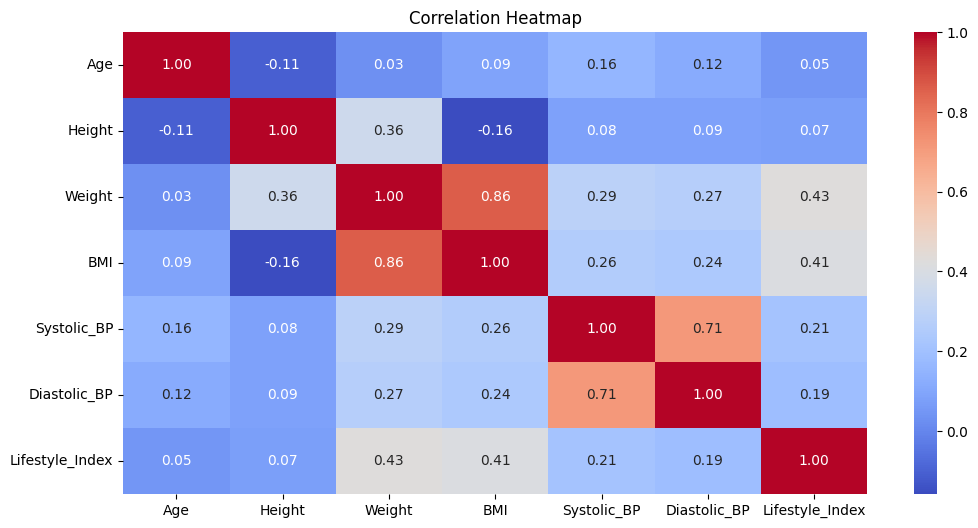

In [164]:
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Room_Number','Billing_Amount','Length_of_Stay'], errors='ignore')


plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
